In [3]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
################################################################################
# Definindo as constantes do problema
delta = 3.45 * 10**(-5)
alpha = 0.168
mu = 2.33 * 10**(-5)
phi = 1.62*10**(-5)
kappa = 0.091
gamma = 0.0013
################################################################################
def vaccines(t): # t em dias
  """
  Essa função determina a taxa de vacinação para o dia t. No caso, a vacinação ocorre entre os meses de abril e outubro
  e é periódica com período de 1 ano

  Args:
    :param t (float): Dia atual
  Returns:
    :return: int 0 se t não estiver entre os meses de abril ou outubro ou float 0.294/214 se estiver
  """
  t  = t % 365 # Toma o resto da divisão de t por 365. No caso, como a vacinação é todo ano no mesmo período, então o resto
  # da divisao de t por 365 dá o dia t do ano x.
  if 0<=t<=90 or 305<=t<=365: # Verifica se o dia t está fora do período de vacinacao, que ocorre entre os dias
    # 91 (1 de abril) até o 204 (31 de outubro)
    return 0
  else:
    # É assumida uma taxa de vacinação constante, em que se vacinou 29,4% da população
    return 0.294/214

def function_with_vaccines(r,t,v,delta=delta,alpha=alpha,mu=mu,gamma=gamma,kappa=kappa,phi=phi):
  """
    Essa funcao calcula os novos valores de das variáveis S, I, R para o caso com vacinação


  Args:
    :param r (array): Array que contem as variaveis S,I,R nessa ordem
    :param t (float): Tempo qualquer
    :param v (float): Taxa de vacinação para determinado dia
    :param delta (float): Taxa de nascimentos por dia
    :param alpha (float): Taxa de infecção
    :param mu (float): Taxa de mortalidade por dia
    :param gamma (float): Taxa de perda de imunidade
    :param kappa (float): Tempo médio de recuperacoa
    :param phi (float): Mortalidade da doenca

  Returns:
    :return: Array contendo os novos valores de S,I,R
  """
  S = r[0]
  I = r[1]
  R = r[2]
  fS = delta - alpha * S * I - mu*S - v*S + gamma * R # Equacao de dS/dt
  fI = alpha * S * I - kappa * I-phi * I - mu*I # Equacao de dI/dt
  fR = kappa * I - mu*R + v *S - gamma * R # Equacao de dR/dt
  return np.array([fS,fI,fR],float)


def function_no_vaccine(r,t,delta=delta,alpha=alpha,mu=mu,gamma=gamma,kappa=kappa,phi=phi):
  """
    Essa funcao calcula os novos valores de das variáveis S, I, R para o caso sem vacinação


  Args:
    :param r (array): Array que contem as variaveis S,I,R nessa ordem
    :param t (float): Tempo qualquer
    :param delta (float): Taxa de nascimentos por dia
    :param alpha (float): Taxa de infecção
    :param mu (float): Taxa de mortalidade por dia
    :param gamma (float): Taxa de perda de imunidade
    :param kappa (float): Tempo médio de recuperacoa
    :param phi (float): Mortalidade da doenca

  Returns:
    :return: Array contendo os novos valores de S,I,R
  """
  S = r[0]
  I = r[1]
  R = r[2]
  fS = delta - alpha * S * I - mu*S + gamma * R  # Equacao de dS/dt
  fI = alpha * S * I - kappa * I-phi * I - mu*I # Equacao de dI/dt
  fR = kappa * I - mu*R - gamma * R  # Equacao de dR/dt
  return np.array([fS,fI,fR],float)


def runge_kutta_4o_3v(N,a,b,r0,with_vaccine = False):
  """
  Essa função realiza o método de Runge-Kutta de 4 ordem para 3 variáveis (S,I,R)


  Args:
    :param N (int): Número de passos para se fazer a conta
    :param a (int): Tempo inicial em dias
    :param b (int): Tempo final em dias
    :param r0 (array): Array contendo os valores iniciais de S,I,R nessa ordem
    :param function (function): Funcao que calcula os novos valores de S,I<R
  Returns:
    :return: Array contendo 4 arrays dentro dele, sendo o primeiro o tempo, o segundo, os suscetiveis, depois os infectados e por ultimo os recuperados
  """


  h = (b-a)/N # Define o passo
  suscetiveis = [] # Define o array dos suscetiveis
  infectados = [] # Define o array dos infecados
  recuperados = [] # Define o array dos recuperados
  tempo = np.arange(a,b,h) # Cria um array com N valores de tempo
  r = np.copy(r0) # Cria um hard copy do array r0 para não alterá-lo durante as contas


  if with_vaccine:
    function = function_with_vaccines
    for t in tempo:
      # Loopando para os valores de tempo
      suscetiveis.append(r[0]/np.sum(r)) # Adiciona o valor de S ao array suscetiveis, sendo esse valor de S normalizado
      infectados.append(r[1]/np.sum(r)) # Adiciona o valor de I normalizado ao array infectados
      recuperados.append(r[2]/np.sum(r)) # Adiciona o valore de R normalizado ao array recuperados
      v = vaccines(t) # Pega a taxa de vacinação de um determinado dia
      #############################################################################
      k1 = h*function(r,t,v)
      k2 = h*function(r+0.5*k1,t+0.5*h,v)
      k3 = h*function(r+0.5*k2,t+0.5*h,v)
      k4 = h*function(r+k3,t+h,v)
      # Os 4 passos acima calculam os parâmetros do metodo de Runge-Kutta de 4 ordem
      #############################################################################
      r += (k1+2*k2+3*k3+k4)/6 # Atualiza o valor das variáveis
  

  else:
    function = function_no_vaccine
    for t in tempo:
      # Loopando para os valores de tempo
      suscetiveis.append(r[0]/np.sum(r)) # Adiciona o valor de S ao array suscetiveis, sendo esse valor de S normalizado
      infectados.append(r[1]/np.sum(r)) # Adiciona o valor de I normalizado ao array infectados
      recuperados.append(r[2]/np.sum(r)) # Adiciona o valore de R normalizado ao array recuperados
      #############################################################################
      k1 = h*function(r,t)
      k2 = h*function(r+0.5*k1,t+0.5*h)
      k3 = h*function(r+0.5*k2,t+0.5*h)
      k4 = h*function(r+k3,t+h)
      # Os 4 passos acima calculam os parâmetros do metodo de Runge-Kutta de 4 ordem
      #############################################################################
      r += (k1+2*k2+3*k3+k4)/6 # Atualiza o valor das variáveis

  return np.array([tempo, suscetiveis, infectados, recuperados])

In [5]:
# Sem vacinação
a = 0 # Tempo inicial
b = 365*2 # Tempo final
N = b # Número de passos igual ao numero de dias, isto e, queremos calcular os novos valores de S,I,R a cada dia
I0 = 2.33*10**(-7) # Define o valor incial normalizado de I, nesse caso são 50 pessoas infectadas de 214_000_000
R0 = 0.3 # Número inicial de pessoas vacinadas no ano anterior, e que se assumiu q ainda possuem certa imunidade
S0 = 1-I0-R0 # Valor inicial de suscetiveis normalizado
r0 = np.array([S0,I0,R0],float) # Define o array r0
tempo,suscetiveis,infectados,recuperados = runge_kutta_4o_3v(N,a,b,r0,with_vaccine=False) # Chamando a funcao

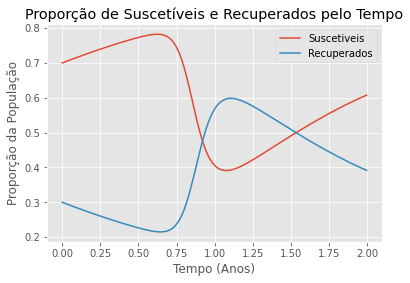

Text(0.5, 1.0, 'Número de Infectados pelo Tempo')

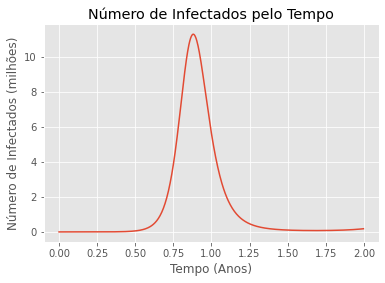

In [6]:
plt.style.use('ggplot')
_ = sns.lineplot(x=tempo/365,y=suscetiveis,label='Suscetiveis')
_ = sns.lineplot(x=tempo/365,y=recuperados,label='Recuperados')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Proporção da População')
plt.title('Proporção de Suscetíveis e Recuperados pelo Tempo')
plt.show()
plt.clf()
_ = sns.lineplot(x=tempo/365,y=infectados*214_000_000/1e6)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Número de Infectados (milhões)')
plt.title('Número de Infectados pelo Tempo')
# Para salvar as imagens basta clicar com shift + botao direito

Text(0.5, 1.0, 'Número de mortos pelo Tempo')

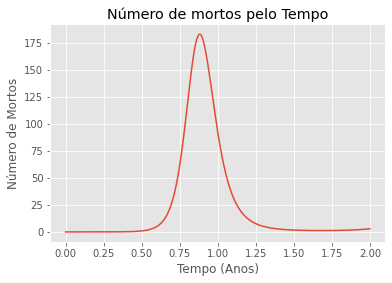

In [7]:
mortos_dia_sem_vacina = phi*infectados*214_000_000
_ = sns.lineplot(x=tempo/365,y=mortos_dia_sem_vacina)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Número de Mortos')
plt.title('Número de mortos pelo Tempo')

In [8]:
hospitalizacao_sem_vacina = 3.55*10**(-4)*infectados*214_000_000
total_mortos_sem_vacina = int(np.sum(mortos_dia_sem_vacina))
total_hospitalizacao_sem_vacina = int(np.sum(hospitalizacao_sem_vacina))
print(f'O total de mortos em 2 anos é: {total_mortos_sem_vacina}')
print(f'O total de hospitalizacoes em 2 anos é {total_hospitalizacao_sem_vacina}')

O total de mortos em 2 anos é: 17660
O total de hospitalizacoes em 2 anos é 387011


In [9]:
# Com vacina
# Sem vacinação
a = 0 # Tempo inicial
b = 365*2 # Tempo final
N = b # Número de passos igual ao numero de dias, isto e, queremos calcular os novos valores de S,I,R a cada dia
I0 = 2.33*10**(-7) # Define o valor incial normalizado de I, nesse caso são 50 pessoas infectadas de 214_000_000
R0 = 0.3 # Número inicial de pessoas vacinadas no ano anterior, e que se assumiu q ainda possuem certa imunidade
S0 = 1-I0-R0 # Valor inicial de suscetiveis normalizado
r0 = np.array([S0,I0,R0],float) # Define o array r0
tempo,suscetiveis_cv,infectados_cv,recuperados_cv = runge_kutta_4o_3v(N,a,b,r0,with_vaccine=True) # Chamando a funcao

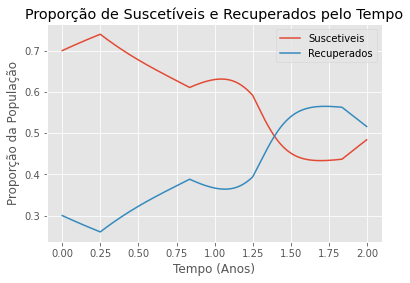

Text(0.5, 1.0, 'Número de Infectados pelo Tempo')

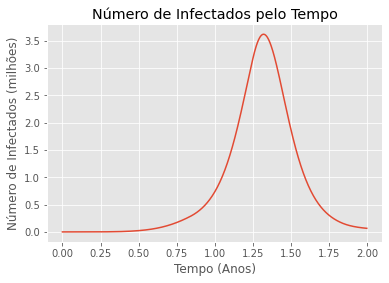

In [10]:
_ = sns.lineplot(x=tempo/365,y=suscetiveis_cv,label='Suscetiveis')
_ = sns.lineplot(x=tempo/365,y=recuperados_cv,label='Recuperados')
plt.xlabel('Tempo (Anos)')
plt.ylabel('Proporção da População')
plt.title('Proporção de Suscetíveis e Recuperados pelo Tempo')
plt.show()
plt.clf()
_ = sns.lineplot(x=tempo/365,y=infectados_cv*214_000_000/1e6)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Número de Infectados (milhões)')
plt.title('Número de Infectados pelo Tempo')

Text(0.5, 1.0, 'Número de mortos pelo Tempo')

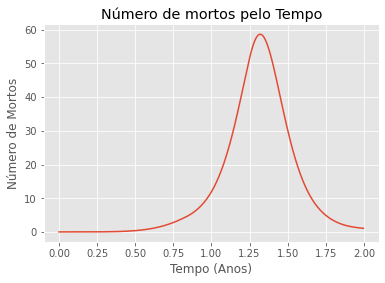

In [11]:
mortos_dia_com_vacina = phi*infectados_cv*214_000_000
_ = sns.lineplot(x=tempo/365,y=mortos_dia_com_vacina)
plt.xlabel('Tempo (Anos)')
plt.ylabel('Número de Mortos')
plt.title('Número de mortos pelo Tempo')

In [12]:
hospitalizacao_com_vacina = 3.55*10**(-4)*infectados_cv*214_000_000
total_mortos_sem_vacina = int(np.sum(mortos_dia_com_vacina))
total_hospitalizacao_com_vacina = int(np.sum(hospitalizacao_com_vacina))
print(f'O total de mortos com vacinacao no periodo de 2 anos é: {total_mortos_sem_vacina}')
print(f'O total de hospitalizacoes com vacinacao no período de 2 anos é: {total_hospitalizacao_com_vacina}')

O total de mortos com vacinacao no periodo de 2 anos é: 9362
O total de hospitalizacoes com vacinacao no período de 2 anos é: 205164


In [14]:
maximo_infectados_sem_vacina = np.max(infectados*214_000_000)
maximo_infectados_com_vacina = np.max(infectados_cv*214_000_000)
print(f'A diferenca entre os picos é: {maximo_infectados_sem_vacina/maximo_infectados_com_vacina}')

A diferenca entre os picos é: 3.122048349730302
